# IEEE Big Data Challenge

## Initial steps

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training = pd.read_csv('./cybersecurity_test.csv', delimiter="|", header=[0])

In [3]:
training.head()

,alert_ids,client_code,categoryname,ip,ipcategory_name,ipcategory_scope,parent_category,grandparent_category,overallseverity,timestamp_dist,...,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d
0,Slg,RLJ,Exploit,MW.YB.50.64,INTERNET,Internet,7,A,3,0,...,298,42,1,0,1,1,1,1,1,1
1,WKM,UZT,Exploit,IJ.NW.77.74,INTERNET,Internet,7,A,5,0,...,11,3,1,0,1,1,1,1,1,1
2,dkm,ZZW,Attack,YT.LB.36.21,INTERNET,Internet,7,A,3,0,...,3601,602,1,0,3,1,1,1,1,1
3,RIX,QXG,Attack,172.BW.LB.105,PRIV-172,Private network,1,A,3,0,...,12,4,1,0,3,1,1,2,1,1
4,qFU,PDU,Exploit,YT.LB.32.110,INTERNET,Internet,7,A,3,258273,...,131,20,1,0,1,1,1,1,1,1


In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 62 columns):
alert_ids                   20000 non-null object
client_code                 20000 non-null object
categoryname                20000 non-null object
ip                          20000 non-null object
ipcategory_name             20000 non-null object
ipcategory_scope            20000 non-null object
parent_category             20000 non-null int64
grandparent_category        20000 non-null object
overallseverity             20000 non-null int64
timestamp_dist              20000 non-null int64
start_hour                  20000 non-null int64
start_minute                20000 non-null int64
start_second                20000 non-null int64
weekday                     20000 non-null object
correlatedcount             20000 non-null int64
n1                          14411 non-null float64
n2                          14411 non-null float64
n3                          14411 non-null flo

Variable Type Changes

## Explanatory analysis of the variables

### Define explanatory analyses

In [5]:
def categorical_variable_exploration( dataset,column, predicted_column, normalize, stacked):
    # Params: 
    #    dataset : Dataframe
    #    column : name of the categorical column
    #    predicted_column: name of the predicted variable
    #    normalize: True/False whether to normalize bar plot
    #    stacked: True/False whether to stack bar plot 
    
    print("Describe")
    print(dataset[column].describe())
    print("\n")
    print("Value counts")
    print(dataset[column].value_counts())
    print("\n")
   # print("Value counts by ", predicted_column)
   # print(training.groupby(column)[predicted_column].value_counts(normalize=normalize).unstack())
    #print("\n")
    #fig = plt.figure()
    #fig.set_size_inches(12,8)
    #dataset.groupby(column)[predicted_column].value_counts(normalize=normalize).unstack().plot(kind='bar', stacked=stacked, figsize=(12,8))
    #plt.show()
    
def joint_variable_exploration(dataset, column, predicted_column, bin_num, quantile, log_scale, no_notify, notify):
    
    print("Describe")
    print(dataset[column].describe())
    print("\n")
    
    # Basic Histogram
    print("Basic Histogram")
    sns.set(style="darkgrid", palette="muted", color_codes=True)
    fig = plt.figure()
    fig.set_size_inches(12,8)
    fig = sns.distplot(dataset[column],bins=bin_num, kde=False)
    if log_scale:
        fig.set_yscale('log')
    plt.show()
    
    #print("Histogram by ",predicted_column)
    
    # Prepare variables
    #notified =  dataset.loc[dataset.notified == 1, column]
    #not_notified = dataset.loc[dataset.notified== 0, column]
    #print("not_notified", not_notified.describe())
    #print("\n") 
    #print("notified: ", notified.describe())
    #print("\n")
   
   
    #fig = plt.figure(figsize=(16,8))
    #if notify:
    #    fig = sns.distplot(notified[notified <= notified.quantile(quantile)], color="dodgerblue", label="notified", bins = bin_num, kde=False)
    #if no_notify:
    #    fig = sns.distplot(not_notified[not_notified <= not_notified.quantile(quantile)], color="orange", label="not_notified", bins = bin_num, kde=False)
    #if log_scale:
    #    fig.set_yscale('log')
    #plt.legend();
    #plt.show()

### alert_ids

- an identifier of the alert, values from this column should be used to match the corresponding records from the event_logs files 
- unique, no relation to the "notified"

### client_code

- encrypted identifiers of clients for which alerts were generated

In [6]:
training['client_code'].value_counts()

OTS    419
WYF    412
UZT    367
QQH    341
MBG    332
PCV    326
AMC    320
OPC    263
OUW    249
SHB    241
XFA    236
ZRV    234
DQN    228
RBC    210
IYB    210
BMU    202
QQC    189
QCN    184
TUE    179
VMQ    172
VBG    172
TRK    171
RVK    166
ZAJ    163
OWD    161
QPI    158
HIV    153
CHP    150
WDX    149
LSB    149
      ... 
XLL     16
JGW     16
FKW     14
ZTR     14
LHY     13
NKJ     12
SII     12
LWI     12
GKY     11
HTP     11
ZPO     10
PVQ     10
YDU     10
BKQ      8
YWC      8
KKL      7
NSX      7
RCX      6
RYC      6
ZIB      5
WOR      5
GJY      5
FIL      4
BRA      4
ODR      4
TIY      3
UXA      3
BCX      3
EAM      3
OAO      1
Name: client_code, Length: 264, dtype: int64

### categoryname

- a category name of the alert that corresponds to its severity
- categorical value

In [7]:
categorical_variable_exploration(dataset=training, column='categoryname', predicted_column='notified', normalize=True, stacked=True)

Describe
count       20000
unique          6
top       Exploit
freq         9632
Name: categoryname, dtype: object


Value counts
Exploit                 9632
Attack                  7288
Control and Maintain    1973
Reconnaissance           517
Attack Preparation       390
Compromise               200
Name: categoryname, dtype: int64




### ip

- an encrypted IP address corresponding to the alert
- TODO: do subnet variable

In [8]:
training['ip'].value_counts()

YT.LB.32.21      628
MC.ER.197.27     518
YT.LB.34.21      434
YT.RD.254.202    413
OQ.QJ.38.32      373
YT.LB.36.21      352
YT.LB.38.21      340
YT.LB.32.10      319
YT.LB.36.10      191
ZU.SK.99.55      174
YT.LB.34.10      173
YT.LB.38.10      136
192.SL.PF.5       80
EU.LI.205.34      61
YT.LB.32.105      53
10.FG.BV.37       51
10.KW.GO.30       50
10.XW.BV.6        50
BI.AL.26.27       49
BI.AL.26.50       45
YT.LB.32.114      44
MW.YB.49.129      43
10.FG.BV.33       39
10.NF.ZT.53       39
FX.GZ.67.43       36
ZU.SK.99.134      35
FX.GZ.67.42       34
FX.GZ.67.44       33
YT.LB.36.105      32
LW.TV.255.202     31
                ... 
192.SL.ZC.121      1
10.ZC.PH.23        1
10.MT.UC.200       1
10.FE.PO.98        1
10.SU.CV.42        1
10.MJ.PF.91        1
10.DK.YR.144       1
OL.YM.106.99       1
192.SL.ZT.76       1
WA.TV.15.80        1
DD.ZS.10.161       1
192.SL.XJ.4        1
10.BW.OR.124       1
10.VS.SZ.106       1
10.YK.SD.77        1
10.HE.BV.12        1
PA.JM.148.202

### ipcategory_name

- a category of the corresponding IP, created based on https://en.wikipedia.org/wiki/Reserved_IP_addresses


In [10]:
categorical_variable_exploration(dataset=training, column='ipcategory_name', predicted_column='notified', normalize=True, stacked=True)

Describe
count        20000
unique           9
top       INTERNET
freq         11005
Name: ipcategory_name, dtype: object


Value counts
INTERNET      11005
PRIV-10        6107
PRIV-192       1647
PRIV-172       1225
LOOPBACK          6
LINK-LOCAL        4
MULTICAST         3
BROADCAST         2
BENCH             1
Name: ipcategory_name, dtype: int64




### ipcategory_scope

- a domain of the corresponding IP category, created based on https://en.wikipedia.org/wiki/Reserved_IP_addresses

In [11]:
categorical_variable_exploration(dataset=training, column='ipcategory_scope', predicted_column='notified', normalize=True, stacked=True)

Describe
count        20000
unique           4
top       Internet
freq         11008
Name: ipcategory_scope, dtype: object


Value counts
Internet           11008
Private network     8980
Subnet                 6
Host                   6
Name: ipcategory_scope, dtype: int64




### parent_category

- a parent category of the IP category name

In [12]:
categorical_variable_exploration(dataset=training, column='parent_category', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         4.303800
std          2.983513
min          1.000000
25%          1.000000
50%          7.000000
75%          7.000000
max          7.000000
Name: parent_category, dtype: float64


Value counts
7    11005
1     8979
4        8
3        5
5        3
Name: parent_category, dtype: int64




### grandparent_category

- a grandparent category of the IP category name
- no idea what is this about
- useless

In [13]:
categorical_variable_exploration(dataset=training, column='grandparent_category', predicted_column='notified', normalize=True, stacked=True)

Describe
count     20000
unique        2
top           A
freq      19989
Name: grandparent_category, dtype: object


Value counts
A    19989
B       11
Name: grandparent_category, dtype: int64




### overallseverity

- an estimation of the alert severity generated by the system rules


In [14]:
categorical_variable_exploration(dataset=training, column='overallseverity', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         3.451150
std          1.002878
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: overallseverity, dtype: float64


Value counts
3    8880
5    4246
4    3757
2    3008
1     109
Name: overallseverity, dtype: int64




### timestamp_dist

- a time period (in seconds) between the first and the last log event corresponding to the alert


Describe
count    2.000000e+04
mean     3.582162e+04
std      9.971210e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.808000e+03
75%      1.707200e+04
max      1.391963e+06
Name: timestamp_dist, dtype: float64


Basic Histogram


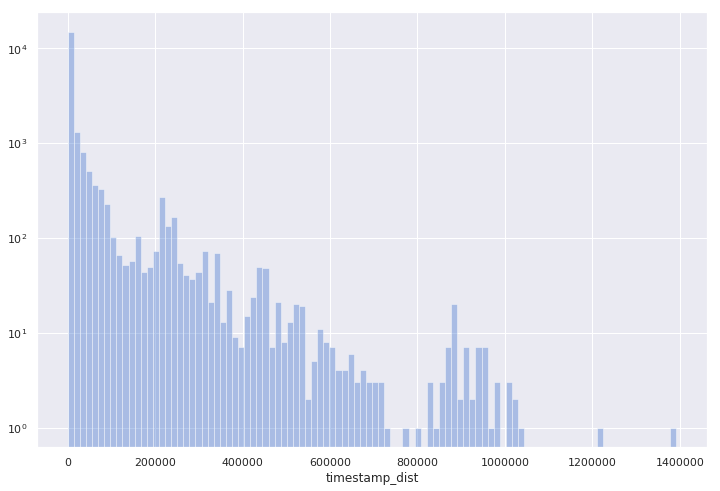

In [15]:
joint_variable_exploration(dataset=training, column='timestamp_dist', predicted_column='notified', bin_num=100, quantile=1, log_scale=True, no_notify=True, notify=True)

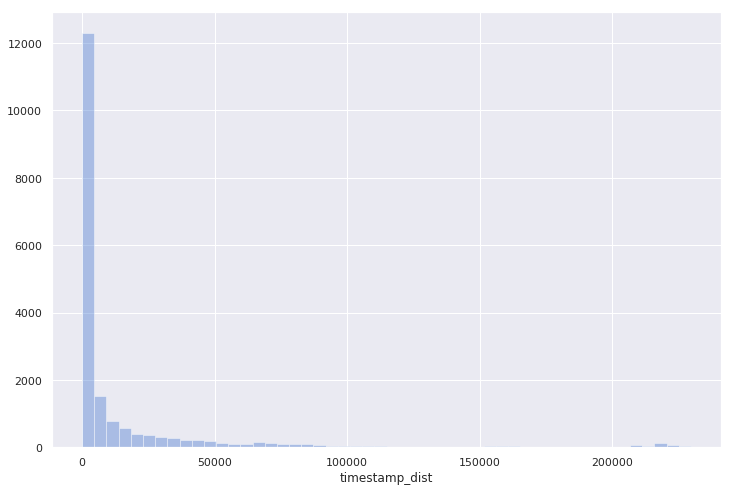

In [16]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
fig = plt.figure()
fig.set_size_inches(12,8)
sns.distplot(training[training['timestamp_dist']< training['timestamp_dist'].quantile(0.95)]['timestamp_dist'],bins=50, kde=False)

### start_hour
- an hour of the first log event that is assumed to be the first of the events corresponding to the alert


In [18]:
categorical_variable_exploration(dataset=training, column='start_hour', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean        12.471250
std          7.239986
min          0.000000
25%          6.000000
50%         13.000000
75%         19.000000
max         23.000000
Name: start_hour, dtype: float64


Value counts
20    1221
23    1132
18    1074
17    1052
22    1029
21    1001
0      970
19     963
1      904
15     894
16     890
2      837
12     775
3      724
10     720
14     711
8      690
11     684
13     683
6      649
5      622
7      617
9      613
4      545
Name: start_hour, dtype: int64




### start_minute
- a minute of the first log event that is assumed to be the first of the events corresponding to the alert

In [19]:
categorical_variable_exploration(dataset=training, column='start_minute', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.00000
mean        29.09010
std         17.56404
min          0.00000
25%         14.00000
50%         29.00000
75%         44.00000
max         59.00000
Name: start_minute, dtype: float64


Value counts
0     483
2     376
12    372
59    370
3     370
50    362
55    362
21    362
33    359
16    354
7     354
20    352
40    350
39    349
10    348
4     348
13    348
23    347
5     344
38    342
44    340
47    339
51    338
30    338
36    337
6     335
43    334
35    334
22    334
28    334
45    333
37    331
18    328
48    328
14    328
57    327
15    327
1     326
54    323
11    321
41    320
32    319
24    318
53    317
58    317
26    316
49    314
31    314
27    313
56    309
19    308
52    308
17    305
8     305
9     301
42    300
25    293
46    286
29    280
34    270
Name: start_minute, dtype: int64




### start_second
- a second of the first log event that is assumed to be the first of the events corresponding to the alert

In [20]:
categorical_variable_exploration(dataset=training, column='start_second', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.00000
mean        29.14675
std         17.48471
min          0.00000
25%         14.00000
50%         29.00000
75%         44.00000
max         59.00000
Name: start_second, dtype: float64


Value counts
2     399
3     386
26    376
24    375
7     369
5     366
57    358
1     356
32    353
35    353
20    353
9     350
30    349
29    349
43    349
55    348
47    348
4     347
10    345
8     343
12    342
54    340
50    340
23    340
37    338
6     338
16    337
39    336
51    334
53    334
59    331
52    330
19    329
17    328
21    327
15    325
48    324
56    323
49    321
14    319
18    319
45    319
13    317
46    316
0     314
58    313
22    313
11    312
33    311
27    310
44    308
40    308
31    308
28    307
42    307
41    307
38    305
25    302
34    302
36    294
Name: start_second, dtype: int64




### weekday
- a day of week of the first log event that is assumed to be the first of the events corresponding to the alert

In [21]:
categorical_variable_exploration(dataset=training, column='weekday', predicted_column='notified', normalize=True, stacked=True)

Describe
count     20000
unique        7
top         Fri
freq       3952
Name: weekday, dtype: object


Value counts
Fri    3952
Thu    3853
Wed    2983
Tue    2725
Sat    2358
Mon    2148
Sun    1981
Name: weekday, dtype: int64




### correlatedcount
- a number of records denoted by the system in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count     20000.000000
mean        106.164700
std        2727.057695
min           1.000000
25%           1.000000
50%           2.000000
75%           9.000000
max      292479.000000
Name: correlatedcount, dtype: float64


Basic Histogram


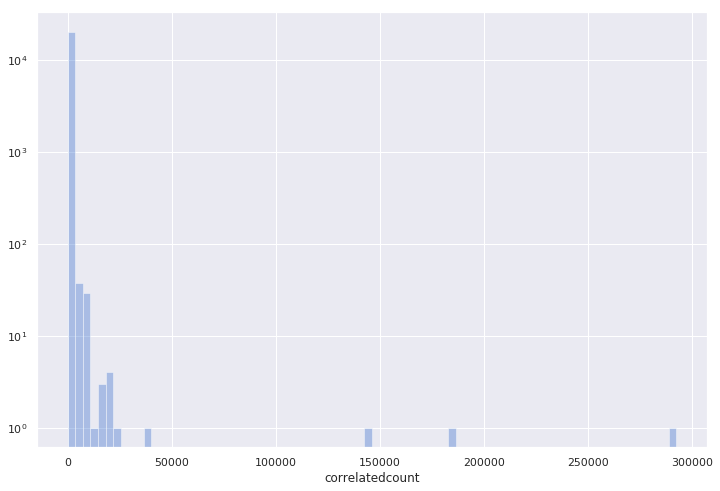

In [22]:
joint_variable_exploration(dataset=training, column='correlatedcount', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### n1, n2 , ... , n10
- a binary fields indicating whether a standard system query1 returned value > 0 (it can be understood as a result of a standard analytical query)
- n1, n2, n9 could have an impact

In [23]:
column_list = []
for i in range(1,11):
    column_list.append("n"+str(i))

training[column_list].apply(pd.Series.value_counts)

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10
0.0,13683,14285,9365,11593,9200,6757,14411.0,14411.0,14162,14411.0
1.0,728,126,5046,2818,5211,7654,NaN,NaN,249,NaN


In [24]:
for column in column_list:
    #print(training.groupby([column,'notified']).size())
    categorical_variable_exploration(dataset=training, column=column, predicted_column='notified', normalize=True, stacked=True)

Describe
count    14411.000000
mean         0.050517
std          0.219017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: n1, dtype: float64


Value counts
0.0    13683
1.0      728
Name: n1, dtype: int64


Describe
count    14411.000000
mean         0.008743
std          0.093099
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: n2, dtype: float64


Value counts
0.0    14285
1.0      126
Name: n2, dtype: int64


Describe
count    14411.000000
mean         0.350149
std          0.477033
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: n3, dtype: float64


Value counts
0.0    9365
1.0    5046
Name: n3, dtype: int64


Describe
count    14411.000000
mean         0.195545
std          0.396633
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        

### score
- a score related to the alert, issued by an autonomous analytical model
- 7 - not notified

In [25]:
categorical_variable_exploration(dataset=training, column='score', predicted_column='notified', normalize=True, stacked=True)

Describe
count    14411.000000
mean         2.261328
std          1.501880
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: score, dtype: float64


Value counts
3.0    4371
1.0    3914
4.0    2471
0.0    1962
2.0     978
5.0     576
6.0     132
7.0       7
Name: score, dtype: int64




### srcip_cd
- a number of different source IP addresses in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    20000.000000
mean        10.380450
std         93.179577
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       3287.000000
Name: srcip_cd, dtype: float64


Basic Histogram


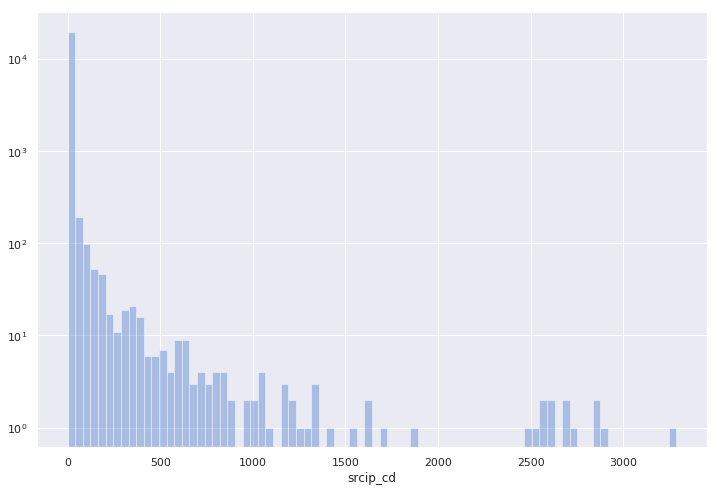

In [26]:
joint_variable_exploration(dataset=training, column='srcip_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### dstip_cd
- a number of destination IP addresses in an auxiliary table with localized alerts, that corresponds to the alert
- more than 13713 -> notifiy

Describe
count    20000.000000
mean        19.792100
std        362.636169
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max      39007.000000
Name: dstip_cd, dtype: float64


Basic Histogram


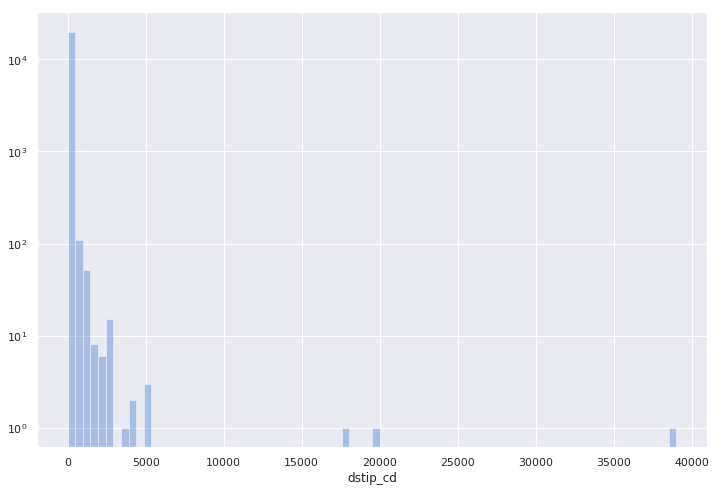

In [27]:
joint_variable_exploration(dataset=training, column='dstip_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### srcport_cd
- a number of different source ports in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    20000.000000
mean        43.667050
std        378.052243
min          0.000000
25%          1.000000
50%          1.000000
75%          6.000000
max      27764.000000
Name: srcport_cd, dtype: float64


Basic Histogram


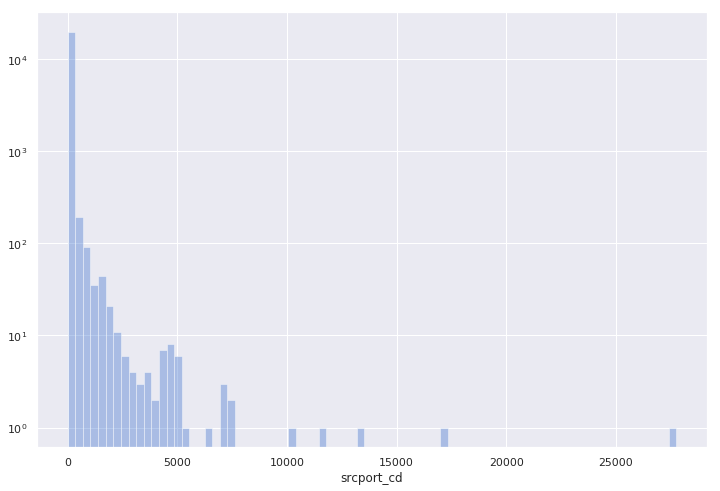

In [28]:
joint_variable_exploration(dataset=training, column='srcport_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### dstport_cd
- a number of different destination ports in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    20000.000000
mean        20.734100
std        227.074392
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       9369.000000
Name: dstport_cd, dtype: float64


Basic Histogram


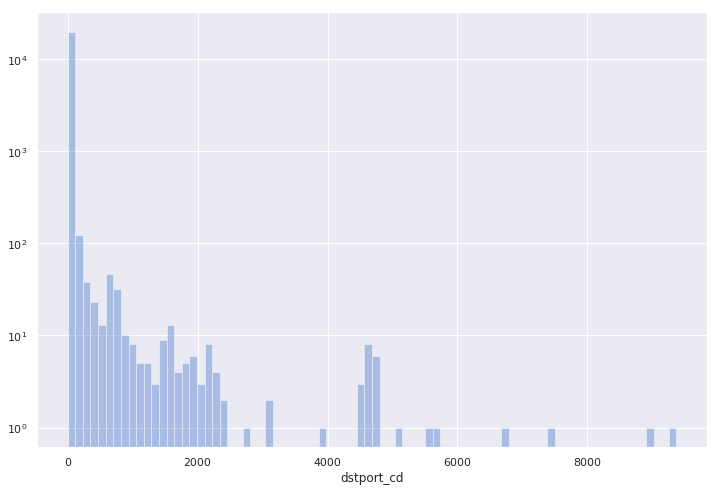

In [29]:
joint_variable_exploration(dataset=training, column='dstport_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### alerttype_cd
- a number of triggered alert types, denoted in an auxiliary table with localized alerts

In [30]:
categorical_variable_exploration(dataset=training, column='alerttype_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         1.171050
std          0.580438
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: alerttype_cd, dtype: float64


Value counts
1     16371
2      2282
0       594
3       593
4       123
5        25
6         7
11        2
7         2
12        1
Name: alerttype_cd, dtype: int64




### direction_cd
- a number of different event directions denoted in an auxiliary table with localized alerts, that corresponds to the alert
- categorical

In [31]:
categorical_variable_exploration(dataset=training, column='direction_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         1.015400
std          0.278328
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: direction_cd, dtype: float64


Value counts
1    18521
2      875
0      594
3        7
5        2
6        1
Name: direction_cd, dtype: int64




### eventname_cd
- a number of different event names (names of events that are dependent on the hardware) denoted in an auxiliary table with localized alerts, that corresponds to the alert
- categorical

In [32]:
categorical_variable_exploration(dataset=training, column='eventname_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         1.182600
std          0.583759
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: eventname_cd, dtype: float64


Value counts
1     15860
2      2853
0       669
3       470
4        96
5        37
6         8
8         3
7         3
14        1
Name: eventname_cd, dtype: int64




### severity_cd
- a number of different severity values associated with individual events denoted in an auxiliary table with localized alerts, that corresponds to the alert
- categorical

In [33]:
categorical_variable_exploration(dataset=training, column='severity_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.00000
mean         1.25720
std          0.80348
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          5.00000
Name: severity_cd, dtype: float64


Value counts
1    16115
2     1955
3      618
0      594
5      393
4      325
Name: severity_cd, dtype: int64




### reportingdevice_cd
- a number of different reporting devices (devices that register the events) denoted in an auxiliary table with localized alerts, that corresponds to the alert


In [34]:
categorical_variable_exploration(dataset=training, column='reportingdevice_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         1.202500
std          1.455197
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        144.000000
Name: reportingdevice_cd, dtype: float64


Value counts
1      16820
2       1911
0        594
3        269
4        237
5         49
6         36
7         24
8         11
9          6
10         6
14         4
12         3
13         3
15         3
11         3
18         3
20         3
16         2
30         2
26         2
21         2
24         2
28         1
37         1
144        1
25         1
31         1
Name: reportingdevice_cd, dtype: int64




### devicetype_cd
- a number of different reporting device types denoted in an auxiliary table with localized alerts, that corresponds to the alert


In [35]:
categorical_variable_exploration(dataset=training, column='devicetype_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         1.024000
std          0.309239
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: devicetype_cd, dtype: float64


Value counts
1    18240
2     1070
0      660
3       27
6        2
7        1
Name: devicetype_cd, dtype: int64




### devicevendor_cd
- a number of different reporting device vendors denoted in an auxiliary table with localized alerts, that corresponds to the alert

In [36]:
categorical_variable_exploration(dataset=training, column='devicevendor_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         1.039650
std          0.347396
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: devicevendor_cd, dtype: float64


Value counts
1    18008
2     1226
0      660
3      103
8        3
Name: devicevendor_cd, dtype: int64




### domain_cd
- a number of different domains denoted in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count     20000.000000
mean         10.972400
std        1533.261765
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      216836.000000
Name: domain_cd, dtype: float64


Basic Histogram


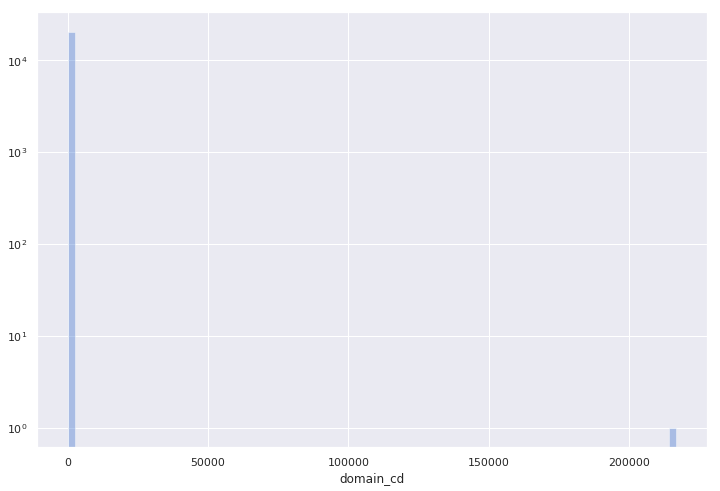

In [37]:
joint_variable_exploration(dataset=training, column='domain_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### protocol_cd
- a number of different protocols denoted in an auxiliary table with localized alerts, that corresponds to the alert

In [38]:
categorical_variable_exploration(dataset=training, column='protocol_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         0.644050
std          1.147134
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max        131.000000
Name: protocol_cd, dtype: float64


Value counts
0      9245
1      8945
2      1677
3       105
4        18
5         5
6         2
15        1
12        1
131       1
Name: protocol_cd, dtype: int64




### username_cd
- a number of different usernames denoted in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    20000.000000
mean         0.391400
std          7.113799
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        608.000000
Name: username_cd, dtype: float64


Basic Histogram


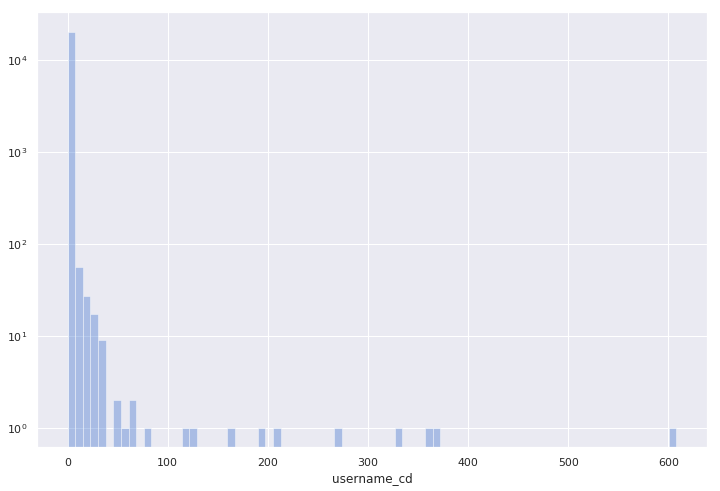

In [39]:
joint_variable_exploration(dataset=training, column='username_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### srcipcategory_cd
- a number of different source IP categories denoted in an auxiliary table with localized alerts, that corresponds to the alert

In [40]:
categorical_variable_exploration(dataset=training, column='srcipcategory_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.00000
mean         1.06210
std          0.38633
min          0.00000
25%          1.00000
50%          1.00000
75%          1.00000
max          4.00000
Name: srcipcategory_cd, dtype: float64


Value counts
1    17872
2     1246
0      594
3      274
4       14
Name: srcipcategory_cd, dtype: int64




### dstipcategory_cd
- a number of different destination IP categories denoted in an auxiliary table with localized alerts, that corresponds to the alert

In [41]:
categorical_variable_exploration(dataset=training, column='dstipcategory_cd', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         0.999650
std          0.245668
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: dstipcategory_cd, dtype: float64


Value counts
1    18832
0      594
2      561
3       13
Name: dstipcategory_cd, dtype: int64




### isiptrusted
- a binary field indicating whether the IP address corresponding to the alert is controlled by the customer

In [42]:
categorical_variable_exploration(dataset=training, column='isiptrusted', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.00000
mean         0.52495
std          0.49939
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: isiptrusted, dtype: float64


Value counts
1    10499
0     9501
Name: isiptrusted, dtype: int64




### untrustscore
- a score based on what is known about the external portion of the communication (network traffic) associated with the alert

In [43]:
categorical_variable_exploration(dataset=training, column='untrustscore', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         2.831250
std          1.600657
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: untrustscore, dtype: float64


Value counts
1    6429
5    5273
3    3391
2    2992
4    1912
9       2
8       1
Name: untrustscore, dtype: int64




### flowscore
- a behavioral score based on behavioral indicators adjusted for the alert

In [44]:
categorical_variable_exploration(dataset=training, column='flowscore', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         3.240550
std          0.565952
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: flowscore, dtype: float64


Value counts
3    16565
4     2059
5     1376
Name: flowscore, dtype: int64




### trustscore
- a score based on what is known about the internal portion of the communication (network traffic) associated with the alert

In [45]:
categorical_variable_exploration(dataset=training, column='trustscore', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         3.112000
std          0.497462
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: trustscore, dtype: float64


Value counts
3    18538
5     1134
4      206
1      112
2       10
Name: trustscore, dtype: int64




### enforcementscore
- an adjustment score based on whether or not the activity associated with the alert was mitigated by a security control

In [46]:
categorical_variable_exploration(dataset=training, column='enforcementscore', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean        -0.418800
std          0.493375
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: enforcementscore, dtype: float64


Value counts
 0    11624
-1     8376
Name: enforcementscore, dtype: int64




### dstipcategory_dominate
- the most frequent ipcategory_name for the destination addresses denoted in an auxiliary table with localized alerts, that corresponds to the alert


In [47]:
categorical_variable_exploration(dataset=training, column='dstipcategory_dominate', predicted_column='notified', normalize=True, stacked=True)

Describe
count        20000
unique           9
top       INTERNET
freq         17570
Name: dstipcategory_dominate, dtype: object


Value counts
INTERNET      17570
PRIV-10        1845
PRIV-192        314
PRIV-172        222
PRIV-CGN         26
BROADCAST        10
MULTICAST         6
LOOPBACK          5
LINK-LOCAL        2
Name: dstipcategory_dominate, dtype: int64




### srcipcategory_dominate
- the most frequent ipcategory_name for the source addresses denoted in an auxiliary table with localized alerts, that corresponds to the alert


In [48]:
categorical_variable_exploration(dataset=training, column='srcipcategory_dominate', predicted_column='notified', normalize=True, stacked=True)

Describe
count       20000
unique          7
top       PRIV-10
freq         9763
Name: srcipcategory_dominate, dtype: object


Value counts
PRIV-10       9763
INTERNET      5292
PRIV-192      2914
PRIV-172      2020
LOOPBACK         5
LINK-LOCAL       5
BENCH            1
Name: srcipcategory_dominate, dtype: int64




### dstportcategory_dominate
- the most frequent ipcategory_name for the destination port denoted in an auxiliary table with localized alerts, that corresponds to the alert


In [49]:
categorical_variable_exploration(dataset=training, column='dstportcategory_dominate', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         2.039700
std          0.650496
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: dstportcategory_dominate, dtype: float64


Value counts
2    15883
3     1591
1     1067
4      797
0      662
Name: dstportcategory_dominate, dtype: int64




### srcportcategory_dominate
- the most frequent ipcategory_name for the source port denoted in an auxiliary table with localized alerts, that corresponds to the alert


In [50]:
categorical_variable_exploration(dataset=training, column='srcportcategory_dominate', predicted_column='notified', normalize=True, stacked=True)

Describe
count    20000.000000
mean         3.224150
std          1.084466
min          0.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: srcportcategory_dominate, dtype: float64


Value counts
4    11050
3     5173
2     1651
1     1462
0      664
Name: srcportcategory_dominate, dtype: int64




### thrcnt_month
- a number of records from an auxiliary table with threat watch alerts, denoted for the same IP address as the alert, during the previous month


Describe
count    20000.000000
mean      2669.555250
std       5364.833747
min          1.000000
25%         35.000000
50%        116.000000
75%       1221.250000
max      18153.000000
Name: thrcnt_month, dtype: float64


Basic Histogram


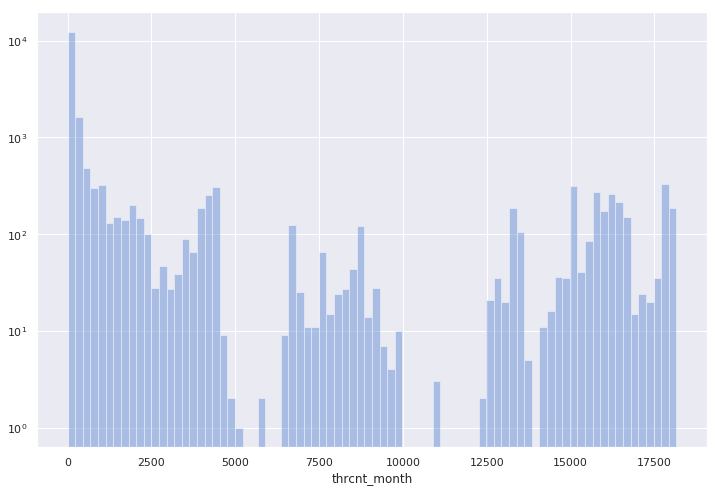

In [51]:
joint_variable_exploration(dataset=training, column='thrcnt_month', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### thrcnt_week
- a number of records from an auxiliary table with threat watch alerts, denoted for the same IP address as the alert, during the previous week

Describe
count    20000.000000
mean       625.604250
std       1239.178175
min          1.000000
25%         10.000000
50%         33.000000
75%        295.250000
max       4146.000000
Name: thrcnt_week, dtype: float64


Basic Histogram


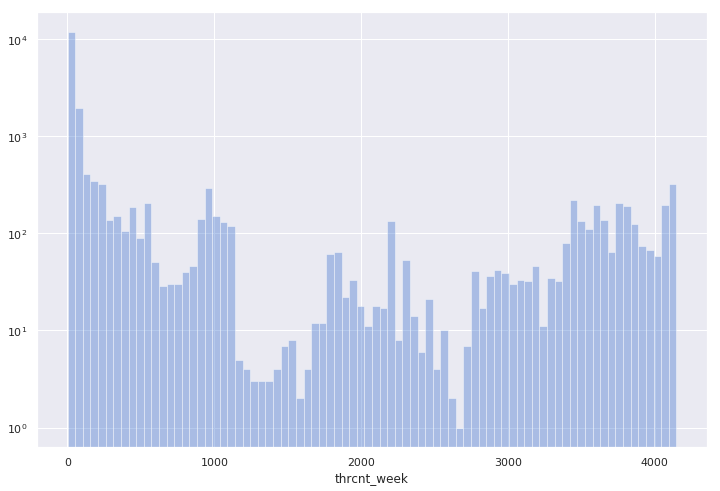

In [52]:
joint_variable_exploration(dataset=training, column='thrcnt_week', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### thrcnt_day
- a number of records from an auxiliary table with threat watch alerts, denoted for the same IP address as the alert, during the previous day

Describe
count    20000.000000
mean       100.154650
std        204.281704
min          1.000000
25%          2.000000
50%          6.000000
75%         48.000000
max        866.000000
Name: thrcnt_day, dtype: float64


Basic Histogram


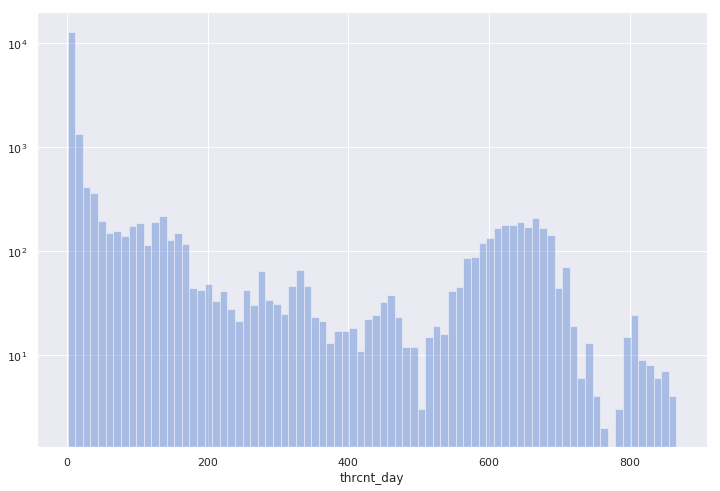

In [53]:
joint_variable_exploration(dataset=training, column='thrcnt_day', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### p6, p5m, p5w, p5d, p8m, p8w, p8d

- a result of an analytical query pX for the corresponding alert, on an auxiliary table with threat watch alerts


In [54]:
column_list = ["p6", "p5m", "p5w", "p5d", "p8m", "p8w", "p8d"]

for column in column_list:
    print("Column: ", column)
    print("\n")
    categorical_variable_exploration(dataset=training, column=column, predicted_column='notified', normalize=True, stacked=True)

Column:  p6


Describe
count    20000.000000
mean         1.171050
std          0.580438
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: p6, dtype: float64


Value counts
1     16371
2      2282
0       594
3       593
4       123
5        25
6         7
11        2
7         2
12        1
Name: p6, dtype: int64


Column:  p5m


Describe
count    20000.000000
mean         1.863550
std          0.903367
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: p5m, dtype: float64


Value counts
1    8919
2    5683
3    4606
4     792
Name: p5m, dtype: int64


Column:  p5w


Describe
count    20000.000000
mean         1.452700
std          0.703269
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: p5w, dtype: float64


Value counts
1    13238
2     4646
3     1940
4      176
Name: p5w, dtype: int64


### p9
- a result of an analytical query p9 for the corresponding alert, on an auxiliary table with threat watch alerts


Describe
count    20000.000000
mean         5.647000
std        200.305986
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22000.000000
Name: p9, dtype: float64


Basic Histogram


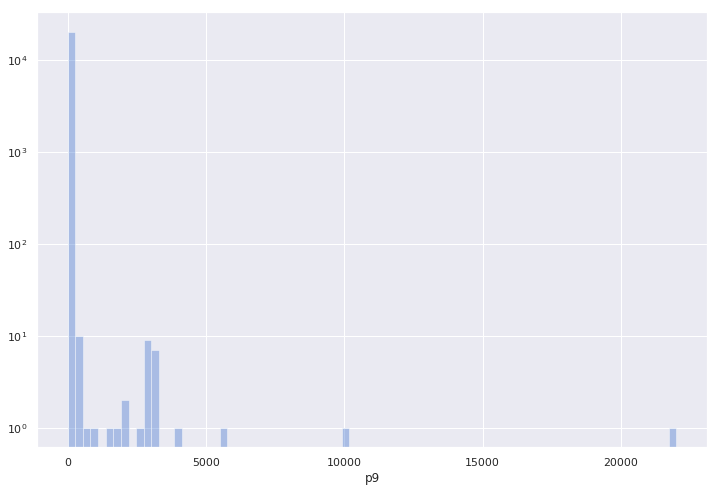

In [55]:
joint_variable_exploration(dataset=training, column='p9', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)